In [1]:
import csv
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
import shap
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor

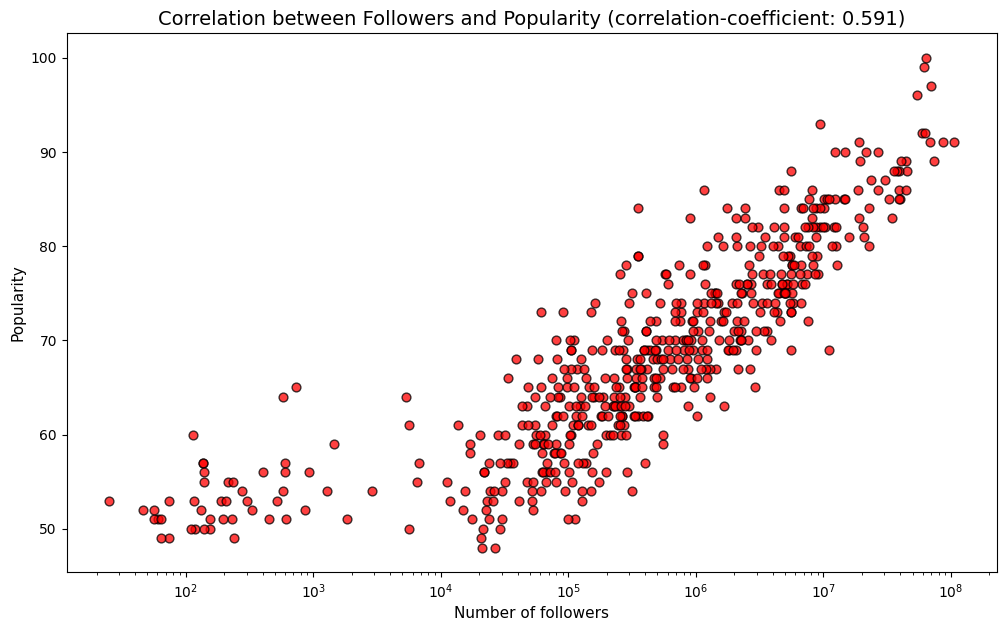

In [2]:
df = pd.read_csv("track_spotify_data.csv")
unique_artists = df['artist_name'].unique().tolist()

artists_followers_popularity = {}
for artist in unique_artists:
    rows_specific_artist = df.loc[df['artist_name'] == artist]
    
    unique_followers = rows_specific_artist['artist_followers'].unique().tolist()
    all_same_followers = all(followers == unique_followers[0] for followers in unique_followers)
    if not all_same_followers:
        print(f"Contradicting follower counts with artist {artist}")
    
    unique_popularity = rows_specific_artist['artist_popularity'].unique().tolist()
    all_same_popularity = all(followers == unique_followers[0] for followers in unique_followers)
    if not all_same_popularity:
        print(f"Contradicting popularity counts with artist {artist}")
        
    followers_popularity_tuple = (unique_followers[0], unique_popularity[0])
    artists_followers_popularity[artist] = followers_popularity_tuple

x = []
y = []

for artist in artists_followers_popularity:
    x.append(artists_followers_popularity[artist][0])
    y.append(artists_followers_popularity[artist][1])

sum_xy = 0
sum_x = 0
sum_y = 0
sum_xsquared = 0
sum_ysquared = 0
counter = 0
for value_x, value_y in zip(x, y):
    counter += 1
    sum_x += value_x
    sum_y += value_y
    sum_xsquared += value_x ** 2
    sum_ysquared += value_y ** 2
    sum_xy += value_x * value_y
        
r = (counter*sum_xy-sum_x*sum_y)/(((counter*sum_xsquared-sum_x**2)*(counter*sum_ysquared-sum_y**2))**0.5)
r = round(r, 3)

figure, axis = plt.subplots(figsize=(12, 7))
plt.subplot()
plt.scatter(x, y, s=40, c='red', edgecolor='black', linewidth=1, alpha=0.75)
plt.title(f"Correlation between Followers and Popularity (correlation-coefficient: {r})", fontsize = 14)
axis.set_xlabel("Number of followers", fontsize = 11)
axis.set_ylabel("Popularity", fontsize = 11)
plt.xscale('log')
plt.show()

In [3]:
features = ["danceability", "energy", "key", "loudness", "mode", "speechiness", "acousticness", "instrumentalness",
            "liveness", "valence", "track_popularity"]

df_features = pd.read_csv('feature_spotify_data.csv')

df_combined = df.merge(df_features, left_on="track_id", right_on="id", how="inner")
all_columns = list(df_combined)
unnecessary_columns = [i for i in all_columns if i not in features]
df_clean = df_combined.drop(unnecessary_columns, axis=1)

x2 = df_clean.drop('track_popularity', axis=1)
y2 = df_clean['track_popularity']

**Acousticness**: A measure from 0.0 to 1.0 that detects acoustic sounds in a track.

**Liveness**: A measure from 0.0 to 1.0 that detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live.

**Speechiness**: A measure from 0.0 to 1.0 that detects the presence of spoken words in a track. The more speech sounds are heard in the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the value will be.

**Instrumentalness:** A measure from 0.0 to 1 that reflects the extent to which a track does not contain vocalizations. The closer the instrumentalness value is to 1.0, the greater the likelihood that the track does not contain vocal content.

**Energy**: A measure from 0.0 to 1.0 that reflects the intensity of a track. Energetic tracks are usually fast, loud, and noisy.

**Loudness**: A measure from -60 and 0 that represents the overall loudness of a track. This value is measured in decibels (dB). Loudness values are averaged across the entire track.

**Danceability**: A measure from 0.0 to 1 that indicates how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, and beat strength. A value closer to 0.0 indicates that a track is less danceable, and value closer to 1.0 is indicates that a track is more danceable.

**Valence**: A measure from 0.0 to 1.0 that reflects the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

**Tempo**: The overall estimated speed of a track measured in beats per minute (BPM).

**Duration**: The duration of a track measured in milliseconds.

**Key**: A measure from 0 to 11 that indicates the key of a track.

**Mode**: A measure that indicates the key in the music of the track (1 is major, and 0 is for minor)

Source: https://rpubs.com/kdrdatascience/862303#:~:text=Speechiness%3A%20A%20measure%20from%200.0,1.0%20the%20value%20will%20be

In [7]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(x2, y2, test_size=0.2, random_state=42)

# Create a neural network model
model = MLPRegressor(hidden_layer_sizes=(100, 50), activation="relu", solver="adam", max_iter=1000)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("R-squared:", r2)
print("MAE:", mae)




R-squared: -0.04147051170142779
MAE: 4.902231012223223
